# Introduction
This is data from prosper loan company. I intend to clean the data, carryout analysis of the data and draw conclusions regarding the data

The ProsperLoan dataset contains 113937 loans records with 81 variables(columns).

In this analysis i seek to do the following 
1. Clean the dataset
2. Figure out what factors affect BorrowersAPR or interest rate
3. Are there diffrences between loans depending on how large the original loan amount was?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')




In [16]:
df = pd.read_csv('Data analytics\prosperLoanData.csv', sep=",")

In [17]:
df.head(2)

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0         0.158        0.138  ...         -133.18                0.0   
1         0.092        0.082  ...            0.00                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  

[2 rows x 81 columns]

In [21]:
df.tail(5)

ListingKey  ListingNumber            ListingCreationDate  \
113932  E6D9357655724827169606C         753087  2013-04-14 05:55:02.663000000   
113933  E6DB353036033497292EE43         537216  2011-11-03 20:42:55.333000000   
113934  E6E13596170052029692BB1        1069178  2013-12-13 05:49:12.703000000   
113935  E6EB3531504622671970D9E         539056  2011-11-14 13:18:26.597000000   
113936  E6ED3600409833199F711B7        1140093  2014-01-15 09:27:37.657000000   

       CreditGrade  Term              LoanStatus           ClosedDate  \
113932         NaN    36                 Current                  NaN   
113933         NaN    36  FinalPaymentInProgress                  NaN   
113934         NaN    60                 Current                  NaN   
113935         NaN    60               Completed  2013-08-13 00:00:00   
113936         NaN    36                 Current                  NaN   

        BorrowerAPR  BorrowerRate  LenderYield  ...  LP_ServiceFees  \
113932      0.22354        0.1864       0.1764  ...          -75.58   
113933      0.13220        0.1110       0.1010  ...          -30.05   
113934      0.23984        0.2150       0.2050  ...          -16.91   
113935      0.28408        0.2605       0.2505  ...         -235.05   
113936      0.13189        0.1039       0.0939  ...           -1.70   

        LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
113932                0.0                    0.0                  0.0   
113933                0.0                    0.0                  0.0   
113934                0.0                    0.0                  0.0   
113935                0.0                    0.0                  0.0   
113936                0.0                    0.0                  0.0   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
113932                             0.0            1.0                0   
113933                             0.0            1.0                0   
113934                             0.0            1.0                0   
113935                             0.0            1.0                0   
113936                             0.0            1.0                0   

       InvestmentFromFriendsCount InvestmentFromFriendsAmount Investors  
113932                          0                         0.0         1  
113933                          0                         0.0        22  
113934                          0                         0.0       119  
113935                          0                         0.0       274  
113936                          0                         0.0         1  

[5 rows x 81 columns]

In [22]:
df.sample(5)

ListingKey  ListingNumber            ListingCreationDate  \
46019   A8A43542862027413DFD0F2         575887  2012-04-05 17:32:55.330000000   
69862   EDDE3507178787298CD2981         492843  2011-02-05 05:53:14.357000000   
97839   EFA034616730255731D2348         421089  2009-08-19 15:15:32.933000000   
86548   C4FA3566884036217B9BA30         692141  2013-01-02 07:17:57.560000000   
103628  0E113588585345083D4EA8F         910605  2013-09-19 10:19:17.610000000   

       CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
46019          NaN    36  Completed  2012-05-03 00:00:00      0.11766   
69862          NaN    36  Completed  2014-02-05 00:00:00      0.16653   
97839          NaN    36  Completed  2010-03-02 00:00:00      0.24974   
86548          NaN    36    Current                  NaN      0.15833   
103628         NaN    36    Current                  NaN      0.19859   

        BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
46019         0.0899       0.0799  ...           -0.22                0.0   
69862         0.1449       0.1349  ...         -123.42                0.0   
97839         0.2270       0.2170  ...           -9.42                0.0   
86548         0.1299       0.1199  ...         -153.25                0.0   
103628        0.1620       0.1520  ...          -11.96                0.0   

        LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
46019                     0.0                  0.0   
69862                     0.0                  0.0   
97839                     0.0                  0.0   
86548                     0.0                  0.0   
103628                    0.0                  0.0   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
46019                              0.0            1.0                0   
69862                              0.0            1.0                0   
97839                              0.0            1.0                0   
86548                              0.0            1.0                0   
103628                             0.0            1.0                0   

       InvestmentFromFriendsCount InvestmentFromFriendsAmount Investors  
46019                           0                         0.0        15  
69862                           0                         0.0       139  
97839                           0                         0.0        91  
86548                           0                         0.0       218  
103628                          0                         0.0         1  

[5 rows x 81 columns]

In [23]:
df.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
count             84853.000000  84853.000000  ...   113937.000000   
mean                  4.072243      5.950067  ...      -54.725641   
std                   1.673227      2.376501  ...       60.675425   
min                   1.000000      1.000000  ...     -664.870000   
25%                   3.000000      4.000000  ...      -73.180000   
50%                   4.000000      6.000000  ...      -34.440000   
75%                   5.000000      8.000000  ...      -13.920000   
max                   7.000000     11.000000  ...       32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      113937.000000          113937.000000        113937.000000   
mean          -14.242698             700.446342           681.420499   
std           109.232758            2388.513831          2357.167068   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    113937.000000  113937.000000    113937.000000   
mean                         25.142686       0.998584         0.048027   
std                         275.657937       0.017919         0.332353   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     115.000000  
max                     33.000000                 25000.000000    1189.000000

In [24]:
df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [25]:
df.shape

(113937, 81)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [18]:
df

ListingKey  ListingNumber            ListingCreationDate  \
0       1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1       10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2       0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3       0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4       0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
...                         ...            ...                            ...   
113932  E6D9357655724827169606C         753087  2013-04-14 05:55:02.663000000   
113933  E6DB353036033497292EE43         537216  2011-11-03 20:42:55.333000000   
113934  E6E13596170052029692BB1        1069178  2013-12-13 05:49:12.703000000   
113935  E6EB3531504622671970D9E         539056  2011-11-14 13:18:26.597000000   
113936  E6ED3600409833199F711B7        1140093  2014-01-15 09:27:37.657000000   

       CreditGrade  Term              LoanStatus           ClosedDate  \
0                C    36               Completed  2009-08-14 00:00:00   
1              NaN    36                 Current                  NaN   
2               HR    36               Completed  2009-12-17 00:00:00   
3              NaN    36                 Current                  NaN   
4              NaN    36                 Current                  NaN   
...            ...   ...                     ...                  ...   
113932         NaN    36                 Current                  NaN   
113933         NaN    36  FinalPaymentInProgress                  NaN   
113934         NaN    60                 Current                  NaN   
113935         NaN    60               Completed  2013-08-13 00:00:00   
113936         NaN    36                 Current                  NaN   

        BorrowerAPR  BorrowerRate  LenderYield  ...  LP_ServiceFees  \
0           0.16516        0.1580       0.1380  ...         -133.18   
1           0.12016        0.0920       0.0820  ...            0.00   
2           0.28269        0.2750       0.2400  ...          -24.20   
3           0.12528        0.0974       0.0874  ...         -108.01   
4           0.24614        0.2085       0.1985  ...          -60.27   
...             ...           ...          ...  ...             ...   
113932      0.22354        0.1864       0.1764  ...          -75.58   
113933      0.13220        0.1110       0.1010  ...          -30.05   
113934      0.23984        0.2150       0.2050  ...          -16.91   
113935      0.28408        0.2605       0.2505  ...         -235.05   
113936      0.13189        0.1039       0.0939  ...           -1.70   

        LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
0                     0.0                    0.0                  0.0   
1                     0.0                    0.0                  0.0   
2                     0.0                    0.0                  0.0   
3                     0.0                    0.0                  0.0   
4                     0.0                    0.0                  0.0   
...                   ...                    ...                  ...   
113932                0.0                    0.0                  0.0   
113933                0.0                    0.0                  0.0   
113934                0.0                    0.0                  0.0   
113935                0.0                    0.0                  0.0   
113936                0.0                    0.0                  0.0   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
0                                  0.0            1.0                0   
1                                  0.0            1.0                0   
2                                  0.0            1.0                0   
3                                  0.0            1.0                0   
4                                  0.0            1.0                0 

In [19]:
df = pd.read_csv('Data Analytics\prosperLoanData.csv', sep=",")

In [31]:
# statistical summary of a column
df['LoanOriginalAmount'].describe()
# df.LoanOriginalAmount

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

In [32]:
# Findind out duplicated row data
df.duplicated().sum()

0

In [33]:
df['ListingKey'].duplicated().sum()

871

In [34]:
df['ListingNumber'].duplicated().sum()

871

In [35]:
df['ListingNumber'].duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
113932    False
113933    False
113934    False
113935    False
113936    False
Name: ListingNumber, Length: 113937, dtype: bool

In [36]:



df[df['ListingKey'].duplicated() == True]

ListingKey  ListingNumber            ListingCreationDate  \
9       0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
999     0A0635972629771021E38F3        1055932  2013-12-18 14:25:17.053000000   
2539    2D2635984503681189056B4        1097584  2014-01-11 07:50:08.037000000   
4942    4B7E3590031274113F1FD34         927246  2013-09-26 09:35:36.317000000   
5812    94B035909835592957503E6         920397  2013-09-24 13:27:48.287000000   
...                         ...            ...                            ...   
113548  FB6A35999320129979DBBA3        1158474  2014-01-23 14:33:25.967000000   
113636  D9BF3589576999233477E75         904020  2013-09-17 11:44:43.177000000   
113733  E2303594522341016B8EE15        1002326  2013-11-07 14:26:31.317000000   
113773  DE8535960513435199406CE        1056749  2013-12-06 05:43:13.830000000   
113863  C74335893905744205D4056         928893  2013-09-26 12:53:34.633000000   

       CreditGrade  Term LoanStatus ClosedDate  BorrowerAPR  BorrowerRate  \
9              NaN    36    Current        NaN      0.07620        0.0629   
999            NaN    60    Current        NaN      0.17710        0.1535   
2539           NaN    60    Current        NaN      0.14528        0.1224   
4942           NaN    36    Current        NaN      0.35356        0.3134   
5812           NaN    36    Current        NaN      0.24205        0.2045   
...            ...   ...        ...        ...          ...           ...   
113548         NaN    60    Current        NaN      0.22063        0.1960   
113636         NaN    36    Current        NaN      0.21290        0.1760   
113733         NaN    60    Current        NaN      0.20593        0.1819   
113773         NaN    36    Current        NaN      0.16324        0.1274   
113863         NaN    36    Current        NaN      0.12691        0.0990   

        LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
9            0.0529  ...          -16.77                0.0   
999          0.1435  ...            0.00                0.0   
2539         0.1124  ...            0.00                0.0   
4942         0.3034  ...          -15.98                0.0   
5812         0.1945  ...          -37.03                0.0   
...             ...  ...             ...                ...   
113548       0.1860  ...            0.00                0.0   
113636       0.1660  ...           -9.86                0.0   
113733       0.1719  ...          -24.94                0.0   
113773       0.1174  ...          -16.79                0.0   
113863       0.0890  ...          -15.99                0.0   

        LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
9                         0.0                  0.0   
999                       0.0                  0.0   
2539                      0.0                  0.0   
4942                      0.0                  0.0   
5812                      0.0                  0.0   
...                       ...                  ...   
113548                    0.0                  0.0   
113636                    0.0                  0.0   
113733                    0.0                  0.0   
113773                    0.0                  0.0   
113863                    0.0                  0.0   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
9                                  0.0            1.0                0   
999                                0.0            1.0                0   
2539                               0.0            1.0                0   
4942                               0.0            1.0                0   
5812                               0.0            1.0                0   
...                                ...            ...              ...   
113548                             0.0            1.0                0   
113636                             0.0            1.0                0   
113733                             0.0            1

In [20]:
df[df['ListingKey'].duplicated() == True]['ListingKey'].head(10)

9       0F043596202561788EA13D5
999     0A0635972629771021E38F3
2539    2D2635984503681189056B4
4942    4B7E3590031274113F1FD34
5812    94B035909835592957503E6
5971    2EC635885737984509D5366
6385    083235967773321272C26B9
7415    5A2F35875117483773421B0
7538    09AD35918712001025AC1BD
7555    021F3593082999771F5E621
Name: ListingKey, dtype: object

In [38]:
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [39]:
df['BorrowerAPR'].isnull().sum()

25

In [40]:
df['BorrowerAPR'].isna().sum()

25

In [42]:
df.nunique()

ListingKey                     113066
ListingNumber                  113066
ListingCreationDate            113064
CreditGrade                         8
Term                                3
                                ...  
PercentFunded                     719
Recommendations                    17
InvestmentFromFriendsCount         14
InvestmentFromFriendsAmount       726
Investors                         751
Length: 81, dtype: int64

In [43]:
df['AvailableBankcardCredit'].nunique()
# df.CreditGrade.nunique()

31829

In [44]:
df_loan_status = df[df['LoanStatus'] =='PastDue']['LoanStatus']
df_loan_status

Series([], Name: LoanStatus, dtype: object)

In [45]:
# Handling of duplicate data
df.drop_duplicates(inplace = True)

In [46]:
df_listing = df['ListingKey']

In [47]:
df_listing.drop_duplicates(inplace = True)

In [48]:
df_listing.duplicated().sum()

0

In [49]:
df.drop_duplicates(['ListingKey', 'ListingNumber'], inplace = True)

In [50]:
df['ListingKey'].duplicated().sum()

0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [23]:
# Renaming a column in a dataframe
df.rename(columns = {'ProsperRating (numeric)': 'ProsperRating_num', 'ProsperRating (Alpha)':'ProsperRating_A', 'ListingCategory (numeric)': 'ListingCategory_n', 'TradesNeverDelinquent (percentage)':'TradesNeverDelinquent'}, inplace= True)

In [52]:
df['ProsperScore'].sample(10)

76377      4.0
106964     7.0
40001     10.0
2534      10.0
57223      8.0
93565      4.0
72045      5.0
56464      NaN
43313      NaN
14950      5.0
Name: ProsperScore, dtype: float64

In [53]:
df[df['ProsperScore'] > 10]['ProsperScore']

69        11.0
158       11.0
224       11.0
236       11.0
277       11.0
          ... 
113762    11.0
113784    11.0
113855    11.0
113881    11.0
113912    11.0
Name: ProsperScore, Length: 1431, dtype: float64

In [54]:
df[df['ProsperScore'] > 10]['ProsperScore'].value_counts()

11.0    1431
Name: ProsperScore, dtype: int64

In [55]:
df[df['ProsperScore'] < 1]['ProsperScore']

Series([], Name: ProsperScore, dtype: float64)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113066 non-null  object 
 1   ListingNumber                        113066 non-null  int64  
 2   ListingCreationDate                  113066 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113066 non-null  int64  
 5   LoanStatus                           113066 non-null  object 
 6   ClosedDate                           55076 non-null   object 
 7   BorrowerAPR                          113041 non-null  float64
 8   BorrowerRate                         113066 non-null  float64
 9   LenderYield                          113066 non-null  float64
 10  EstimatedEffectiveYield              83982 non-null   float64
 11  EstimatedLoss

In [24]:
df_work = df[['ListingKey', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ListingCategory_n', 'BorrowerState', 'Occupation', 'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'DebtToIncomeRatio', 'IncomeVerifiable']]

In [25]:
df_work.head(5)

ListingKey  Term LoanStatus  BorrowerAPR  BorrowerRate  \
0  1021339766868145413AB3B    36  Completed      0.16516        0.1580   
1  10273602499503308B223C1    36    Current      0.12016        0.0920   
2  0EE9337825851032864889A    36  Completed      0.28269        0.2750   
3  0EF5356002482715299901A    36    Current      0.12528        0.0974   
4  0F023589499656230C5E3E2    36    Current      0.24614        0.2085   

   ListingCategory_n BorrowerState     Occupation     IncomeRange  \
0                  0            CO          Other  $25,000-49,999   
1                  2            CO   Professional  $50,000-74,999   
2                  0            GA          Other   Not displayed   
3                 16            GA  Skilled Labor  $25,000-49,999   
4                  2            MN      Executive       $100,000+   

   StatedMonthlyIncome  LoanOriginalAmount  MonthlyLoanPayment  \
0          3083.333333                9425              330.43   
1          6125.000000               10000              318.93   
2          2083.333333                3001              123.32   
3          2875.000000               10000              321.45   
4          9583.333333               15000              563.97   

   DebtToIncomeRatio  IncomeVerifiable  
0               0.17              True  
1               0.18              True  
2               0.06              True  
3               0.15              True  
4               0.26              True

In [26]:
#setting Listing Key an an index of the dataframe
df_work.set_index('ListingKey', inplace=True)

In [27]:
df_work.head(5)

Term LoanStatus  BorrowerAPR  BorrowerRate  \
ListingKey                                                            
1021339766868145413AB3B    36  Completed      0.16516        0.1580   
10273602499503308B223C1    36    Current      0.12016        0.0920   
0EE9337825851032864889A    36  Completed      0.28269        0.2750   
0EF5356002482715299901A    36    Current      0.12528        0.0974   
0F023589499656230C5E3E2    36    Current      0.24614        0.2085   

                         ListingCategory_n BorrowerState     Occupation  \
ListingKey                                                                
1021339766868145413AB3B                  0            CO          Other   
10273602499503308B223C1                  2            CO   Professional   
0EE9337825851032864889A                  0            GA          Other   
0EF5356002482715299901A                 16            GA  Skilled Labor   
0F023589499656230C5E3E2                  2            MN      Executive   

                            IncomeRange  StatedMonthlyIncome  \
ListingKey                                                     
1021339766868145413AB3B  $25,000-49,999          3083.333333   
10273602499503308B223C1  $50,000-74,999          6125.000000   
0EE9337825851032864889A   Not displayed          2083.333333   
0EF5356002482715299901A  $25,000-49,999          2875.000000   
0F023589499656230C5E3E2       $100,000+          9583.333333   

                         LoanOriginalAmount  MonthlyLoanPayment  \
ListingKey                                                        
1021339766868145413AB3B                9425              330.43   
10273602499503308B223C1               10000              318.93   
0EE9337825851032864889A                3001              123.32   
0EF5356002482715299901A               10000              321.45   
0F023589499656230C5E3E2               15000              563.97   

                         DebtToIncomeRatio  IncomeVerifiable  
ListingKey                                                    
1021339766868145413AB3B               0.17              True  
10273602499503308B223C1               0.18              True  
0EE9337825851032864889A               0.06              True  
0EF5356002482715299901A               0.15              True  
0F023589499656230C5E3E2               0.26              True

In [28]:
# Getting a Term of index 10273602499503308B223C1
df_work['Term']['10273602499503308B223C1']

36

In [62]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113066 entries, 1021339766868145413AB3B to E6ED3600409833199F711B7
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Term                 113066 non-null  int64  
 1   LoanStatus           113066 non-null  object 
 2   BorrowerAPR          113041 non-null  float64
 3   BorrowerRate         113066 non-null  float64
 4   ListingCategory_n    113066 non-null  int64  
 5   BorrowerState        107551 non-null  object 
 6   Occupation           109537 non-null  object 
 7   IncomeRange          113066 non-null  object 
 8   StatedMonthlyIncome  113066 non-null  float64
 9   LoanOriginalAmount   113066 non-null  int64  
 10  MonthlyLoanPayment   113066 non-null  float64
 11  DebtToIncomeRatio    104594 non-null  float64
 12  IncomeVerifiable     113066 non-null  bool   
dtypes: bool(1), float64(5), int64(3), object(4)
memory usage: 15.4+ MB


In [29]:
#Saving the edited dataframe to avoid running cells from above
df_work.to_csv('Data Analytics\Cleaned_prosperLoanData.csv', index=False)

In [75]:
import pandas as pd

In [76]:
df_work = pd.read_csv('Data analytics\cleaned_prosperLoanData.csv', sep=",")

In [77]:
df_work.BorrowerAPR.sample(20)

50211     0.31420
30741     0.20808
97720     0.14857
108732    0.25133
84694     0.19029
30395     0.11587
110393    0.22108
18069     0.26681
41504     0.12782
9531      0.25259
36746     0.25371
52286     0.17359
84376     0.26762
18505     0.09437
75485     0.17189
39185     0.21372
102853    0.25259
916       0.15713
54377     0.34731
105115    0.12081
Name: BorrowerAPR, dtype: float64

In [79]:
df_work['Occupation'].sample(10)

99747    Professional
8058        Executive
28932           Other
67848           Other
11134    Truck Driver
68986        Attorney
81895    Professional
91147         Analyst
89129         Analyst
76402    Professional
Name: Occupation, dtype: object

In [81]:
df_work['Occupation'].value_counts()

Other                          28422
Professional                   13531
Computer Programmer             4442
Executive                       4280
Teacher                         3729
                               ...  
Dentist                           67
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

In [82]:
# Displavying unique occupation values
df_work['Occupation'].unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


In [83]:
df_work['DebtToIncomeRatio'].sample(10)

41531     0.23
6213      0.26
63125     0.12
49510     0.36
64927     0.30
111246    0.43
29842     0.15
25919     0.15
101684    0.21
75088     0.29
Name: DebtToIncomeRatio, dtype: float64

In [30]:
df_work.isna().sum()

Term                      0
LoanStatus                0
BorrowerAPR              25
BorrowerRate              0
ListingCategory_n         0
BorrowerState          5515
Occupation             3588
IncomeRange               0
StatedMonthlyIncome       0
LoanOriginalAmount        0
MonthlyLoanPayment        0
DebtToIncomeRatio      8554
IncomeVerifiable          0
dtype: int64

In [31]:
#calculating the mean values
mean = df_work['BorrowerAPR'].mean()

In [32]:
print(mean)

0.21882765590982514


In [33]:
 df_work['BorrowerAPR'] = df_work['BorrowerAPR'].fillna(mean)
    

In [34]:
# df_work['BorrowerAPR'].fillna(mean, inplace=True)

In [35]:
df_work.isna().sum()

Term                      0
LoanStatus                0
BorrowerAPR               0
BorrowerRate              0
ListingCategory_n         0
BorrowerState          5515
Occupation             3588
IncomeRange               0
StatedMonthlyIncome       0
LoanOriginalAmount        0
MonthlyLoanPayment        0
DebtToIncomeRatio      8554
IncomeVerifiable          0
dtype: int64

In [36]:
df_work['Occupation'] = df_work['Occupation'].fillna('Other')

In [136]:
# Dropping rows with null value
# df_work.dropna(inplace=True)
# df_work['DebtToIncomeRatio'].dropna(inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18192\1353303043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work.dropna(inplace=True)


In [37]:
df_work.isna().sum()

Term                      0
LoanStatus                0
BorrowerAPR               0
BorrowerRate              0
ListingCategory_n         0
BorrowerState          5515
Occupation                0
IncomeRange               0
StatedMonthlyIncome       0
LoanOriginalAmount        0
MonthlyLoanPayment        0
DebtToIncomeRatio      8554
IncomeVerifiable          0
dtype: int64

In [38]:
df_work['BorrowerRate'].isna().sum()

0

In [39]:
df_work['BorrowerRate'] = df_work['BorrowerRate'].dropna()

In [40]:
df_work['BorrowerRate'].isna().sum()

0

In [41]:
df_work.isna().sum()

Term                      0
LoanStatus                0
BorrowerAPR               0
BorrowerRate              0
ListingCategory_n         0
BorrowerState          5515
Occupation                0
IncomeRange               0
StatedMonthlyIncome       0
LoanOriginalAmount        0
MonthlyLoanPayment        0
DebtToIncomeRatio      8554
IncomeVerifiable          0
dtype: int64

In [8]:
import pandas as pd



In [9]:
df_work = pd.read_csv('Data analytics\cleaned_prosperLoanData.csv', sep=",")

In [10]:
df_work['DebtToIncomeRatio'].sample(30)

28516     0.24
100414    0.10
17396     0.16
53608     0.18
77108     0.14
9545      0.25
94400      NaN
21072      NaN
100242    0.40
63372     0.31
109250    0.45
61168     0.30
50626      NaN
89859     0.19
75564     0.12
7758      0.17
9026      0.14
13176     0.31
110221    0.25
34884     0.15
102076    0.30
112545     NaN
91578     0.04
421       0.23
86697     0.07
111513    0.14
13690     0.23
20255     0.26
52818     0.19
20722     0.29
Name: DebtToIncomeRatio, dtype: float64

In [99]:
df_work.isna().sum()

Term                      0
LoanStatus                0
BorrowerAPR              25
BorrowerRate              0
ListingCategory_n         0
BorrowerState          5515
Occupation             3529
IncomeRange               0
StatedMonthlyIncome       0
LoanOriginalAmount        0
MonthlyLoanPayment        0
DebtToIncomeRatio      8472
IncomeVerifiable          0
dtype: int64

In [42]:
#Saving the edited dataframe to avoid running cells from above
df_work.to_csv('Data Analytics\Cleaned_prosperLoanData2.csv', index=False)


In [43]:
df_work = pd.read_csv('Data Analytics\Cleaned_prosperLoanData2.csv')

In [44]:
df_work.sample(10)

Term  LoanStatus  BorrowerAPR  BorrowerRate  ListingCategory_n  \
113663    36  Chargedoff      0.29525        0.2875                  0   
70548     36   Completed      0.13002        0.1230                  0   
5171      60   Completed      0.21166        0.1875                  1   
4657      36     Current      0.23438        0.1970                  1   
18869     36   Completed      0.29537        0.2566                  1   
77302     36   Completed      0.07439        0.0710                  7   
26905     60     Current      0.22908        0.2045                  1   
64666     36     Current      0.17969        0.1435                  1   
20278     36   Completed      0.30532        0.2699                  6   
63858     60     Current      0.19681        0.1730                  1   

       BorrowerState                Occupation     IncomeRange  \
113663           NaN                     Other   Not displayed   
70548             IL       Computer Programmer       $1-24,999   
5171              NY                     Other  $75,000-99,999   
4657              IN                 Executive  $50,000-74,999   
18869             CO     Engineer - Electrical  $50,000-74,999   
77302             KS                     Other  $50,000-74,999   
26905             MS                     Other  $25,000-49,999   
64666             MO              Construction  $50,000-74,999   
20278             FL  Administrative Assistant  $25,000-49,999   
63858             TX              Professional       $100,000+   

        StatedMonthlyIncome  LoanOriginalAmount  MonthlyLoanPayment  \
113663          3500.000000                2500              104.42   
70548           1200.000000                5000              166.79   
5171            6309.416667               15000              387.05   
4657            4583.333333               15000              555.16   
18869           5833.333333                6700              268.74   
77302           5734.083333                3500              108.23   
26905           3333.333333               10000              267.45   
64666           4416.666667               15000              515.22   
20278           2500.000000                2000               81.64   
63858           8358.333333               13000              325.18   

        DebtToIncomeRatio  IncomeVerifiable  
113663               0.03              True  
70548                0.15              True  
5171                 0.37              True  
4657                 0.40              True  
18869                0.24              True  
77302                0.17              True  
26905                 NaN             False  
64666                0.31              True  
20278                0.06              True  
63858                0.36              True

In [45]:
df_work.isna().sum() 

Term                      0
LoanStatus                0
BorrowerAPR               0
BorrowerRate              0
ListingCategory_n         0
BorrowerState          5515
Occupation                0
IncomeRange               0
StatedMonthlyIncome       0
LoanOriginalAmount        0
MonthlyLoanPayment        0
DebtToIncomeRatio      8554
IncomeVerifiable          0
dtype: int64

In [46]:
df_work['BorrowerState'].head(20).value_counts

<bound method IndexOpsMixin.value_counts of 0      CO
1      CO
2      GA
3      GA
4      MN
5      NM
6      KS
7      CA
8      IL
9      IL
10     MD
11    NaN
12     AL
13     AZ
14     VA
15     FL
16     CA
17    NaN
18     PA
19     OR
Name: BorrowerState, dtype: object>

In [47]:
df_work['BorrowerState'].value_counts()

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
MN     2318
MA     2242
CO     2210
IN     2078
AZ     1901
WI     1842
OR     1817
TN     1737
AL     1679
CT     1627
SC     1122
NV     1090
KS     1062
KY      983
OK      971
LA      954
UT      877
AR      855
MS      787
NE      674
ID      599
NH      551
NM      472
RI      435
HI      409
WV      391
DC      382
MT      330
DE      300
VT      207
AK      200
SD      189
IA      186
WY      150
ME      101
ND       52
Name: BorrowerState, dtype: int64

### filling null values in borrowers state column with 'OT' to signify others 

In [48]:
df_work['BorrowerState'].fillna('OT', inplace = True)

In [49]:
df_work.isna().sum()

Term                      0
LoanStatus                0
BorrowerAPR               0
BorrowerRate              0
ListingCategory_n         0
BorrowerState             0
Occupation                0
IncomeRange               0
StatedMonthlyIncome       0
LoanOriginalAmount        0
MonthlyLoanPayment        0
DebtToIncomeRatio      8554
IncomeVerifiable          0
dtype: int64

In [50]:
df_work['Term'].value_counts() 

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [51]:
df_work['ListingCategory_n'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory_n, dtype: int64

In [52]:
df_work.shape

(113937, 13)

In [27]:
listnumericdefinition = {0:'Not Available', 1:'Debt Consolidation', 2:'Home Improvement',3:'Business', 4:'Personal Loan', 5:'Student Use', 
                         6:'Auto', 7:'Other', 8:'Baby&Adoption', 9:'Boat', 10:'Cosmetic Procedure', 11:'Engagement Ring', 12:'Green Loans', 
                         13:'Household Expenses', 14:'Large Purchases', 15:'Medical/Dental', 16:'Motorcycle', 17:'RV', 
                         18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}


In [28]:
#loop over the data set, creating a list of labels that corrresponds to the dictionary definition of the values.
label_list = []
for i in range(df_work.shape[0]):
    for j in range(len(listnumericdefinition)):
        if df_work['ListingCategory_n'].values[i] == list(listnumericdefinition.keys())[j]:
             label_list.append(list(listnumericdefinition.values())[j])

In [29]:
df_work['ListingCategory_n'].head(5)

0     0
1     2
2     0
3    16
4     2
Name: ListingCategory_n, dtype: int64

In [30]:
print(label_list)

['Not Available', 'Home Improvement', 'Not Available', 'Motorcycle', 'Home Improvement', 'Debt Consolidation', 'Debt Consolidation', 'Home Improvement', 'Other', 'Debt Consolidation', 'Not Available', 'Debt Consolidation', 'Debt Consolidation', 'Debt Consolidation', 'Household Expenses', 'Auto', 'Not Available', 'Debt Consolidation', 'Debt Consolidation', 'Debt Consolidation', 'Not Available', 'Debt Consolidation', 'Medical/Dental', 'Debt Consolidation', 'Medical/Dental', 'Debt Consolidation', 'Debt Consolidation', 'Home Improvement', 'Debt Consolidation', 'Wedding Loans', 'Home Improvement', 'Debt Consolidation', 'Other', 'Debt Consolidation', 'Debt Consolidation', 'Debt Consolidation', 'Medical/Dental', 'Debt Consolidation', 'Not Available', 'Debt Consolidation', 'Other', 'Not Available', 'Debt Consolidation', 'Debt Consolidation', 'Debt Consolidation', 'Debt Consolidation', 'Debt Consolidation', 'Debt Consolidation', 'Debt Consolidation', 'Debt Consolidation', 'Debt Consolidation', 

In [31]:
df_work['listingCategory_labels'] = label_list


In [59]:
df_work.sample(25)

Term            LoanStatus  BorrowerAPR  BorrowerRate  \
37921     60               Current      0.22242        0.1980   
76736     36               Current      0.18275        0.1465   
5744      60               Current      0.19364        0.1699   
110939    60               Current      0.18580        0.1620   
39313     36               Current      0.06726        0.0605   
54817     36               Current      0.35797        0.3177   
81856     36               Current      0.19088        0.1619   
13029     36             Completed      0.17359        0.1449   
6684      36            Chargedoff      0.25278        0.2300   
65851     36             Completed      0.37453        0.3500   
82784     36             Completed      0.28370        0.2452   
60296     36             Completed      0.11586        0.1089   
105564    60               Current      0.18555        0.1620   
54084     60               Current      0.15783        0.1349   
109217    36  Past Due (1-15 days)      0.28370        0.2452   
47043     36               Current      0.09434        0.0809   
23940     60               Current      0.25102        0.2259   
39031     36               Current      0.14714        0.1189   
2040      36             Completed      0.10133        0.0840   
21502     36            Chargedoff      0.37453        0.3500   
98506     60               Current      0.31159        0.2849   
102569    36               Current      0.14206        0.1139   
76901     36               Current      0.28851        0.2499   
23470     60             Completed      0.28704        0.2610   
10455     60               Current      0.24856        0.2235   

        ListingCategory_n BorrowerState                Occupation  \
37921                   1            HI         Military Enlisted   
76736                   1            MO                  Attorney   
5744                    1            CA                 Executive   
110939                  1            AZ                  Attorney   
39313                   1            CA  Administrative Assistant   
54817                   7            FL  Administrative Assistant   
81856                   2            TX                     Other   
13029                   3            AZ        Sales - Commission   
6684                    7            CA                     Other   
65851                   3            LA              Professional   
82784                  18            NC              Professional   
60296                   0            OT                     Other   
105564                  1            AZ   Food Service Management   
54084                   1            TX              Professional   
109217                  7            IL  Administrative Assistant   
47043                  18            TX                   Analyst   
23940                   3            MA       Computer Programmer   
39031                   1            TX        Sales - Commission   
2040                    0            OT                     Other   
21502                   5            GA           Waiter/Waitress   
98506                   1            NC                   Analyst   
102569                 14            WI             Skilled Labor   
76901                   2            CA              Professional   
23470                   1            MI                 Executive   
10455                   1            FL                     Other   

           IncomeRange  StatedMonthlyIncome  LoanOriginalAmount  \
37921   $75,000-99,999          8265.416667               25000   
76736   $75,000-99,999          6750.000000               15000   
5744    $50,000-74,999          6000.000000               20000   
110939       $100,000+         10291.666667               18000   
39313   $50,000-74,999          5000.000000                5000   
54817   $25,000-49,999          2666.666667                4000   
81856        $1-24,999          1916.666667          

In [60]:
df_work['Occupation'].unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',
     

In [61]:
df_work['IncomeRange'].unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [62]:
df_work[df_work['IncomeRange']=='$0'].IncomeRange.value_counts()

$0    621
Name: IncomeRange, dtype: int64

In [63]:
df_work[df_work['IncomeRange']=='$0'].StatedMonthlyIncome.sample(10)

39839     0.0
73377     0.0
16763     0.0
84566     0.0
37530     0.0
81917     0.0
5898      0.0
47391     0.0
113409    0.0
66932     0.0
Name: StatedMonthlyIncome, dtype: float64

In [64]:
df_work[df_work['IncomeRange']=='$0'].MonthlyLoanPayment.sample(10)

2064      239.24
70266     373.73
106854    252.70
28757     683.55
44905      64.19
22236     827.23
64754     108.46
106246    163.37
103335     39.09
44039      40.43
Name: MonthlyLoanPayment, dtype: float64

In [65]:
df_work[df_work['IncomeRange']=='$0'].IncomeVerifiable.sample(20)

2064      False
2967      False
92192     False
80806     False
61498     False
104211    False
84093     False
66135     False
109009    False
79175      True
94881     False
49319     False
102968     True
99396     False
91015     False
57584     False
104849    False
93386     False
23240     False
14681     False
Name: IncomeVerifiable, dtype: bool

In [66]:
df_work[df_work['IncomeVerifiable']==False].IncomeRange.value_counts()

$25,000-49,999    2325
$50,000-74,999    1705
$100,000+         1273
$1-24,999         1024
$75,000-99,999     906
Not employed       707
$0                 598
Not displayed      131
Name: IncomeRange, dtype: int64

### Exploratory Analysis of the dataset using some plottting

array([[<Axes: title={'center': 'Term'}>,
        <Axes: title={'center': 'BorrowerAPR'}>,
        <Axes: title={'center': 'BorrowerRate'}>],
       [<Axes: title={'center': 'ListingCategory_n'}>,
        <Axes: title={'center': 'StatedMonthlyIncome'}>,
        <Axes: title={'center': 'LoanOriginalAmount'}>],
       [<Axes: title={'center': 'MonthlyLoanPayment'}>,
        <Axes: title={'center': 'DebtToIncomeRatio'}>, <Axes: >]],
      dtype=object)

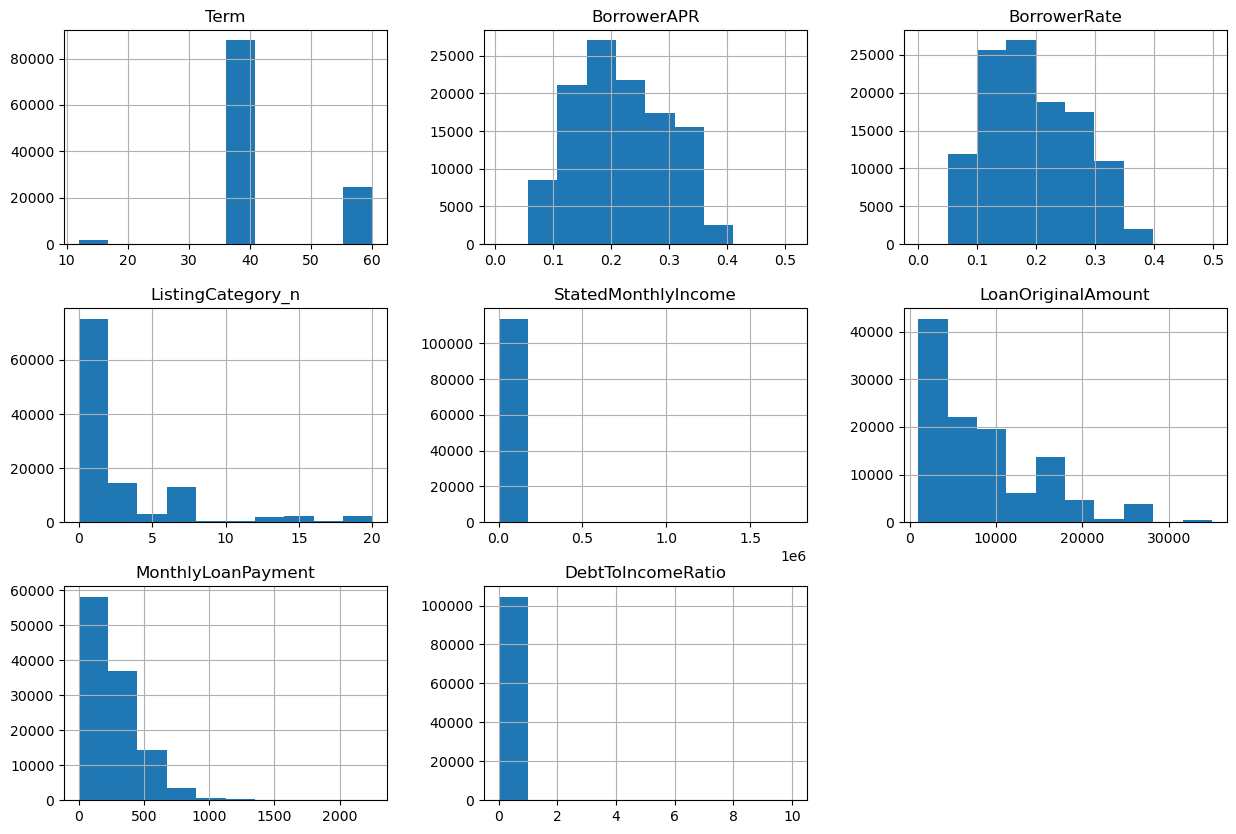

In [67]:
#histogram plot of the entire dataset specifying the height and width to be 10
df_work.hist(figsize=[15,10])

array([[<Axes: title={'center': 'Term'}>]], dtype=object)

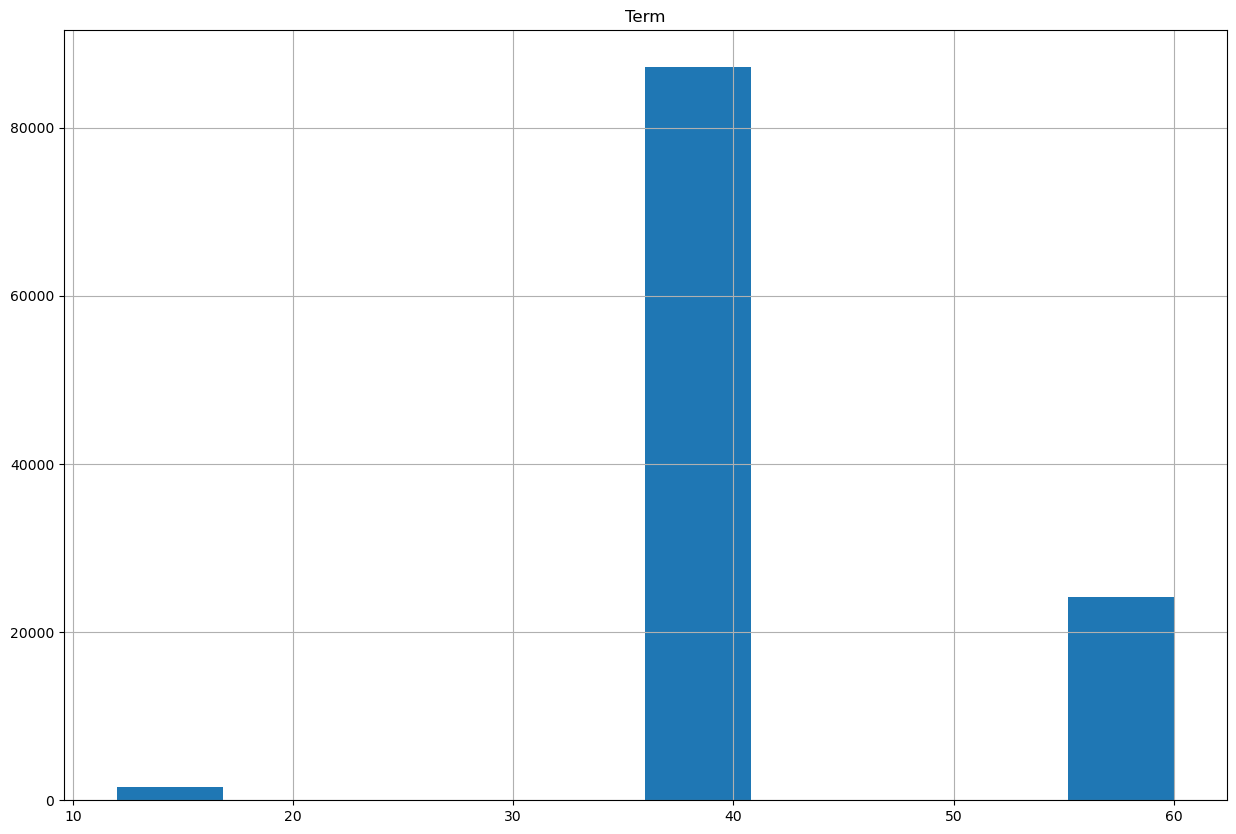

In [70]:
#histogram plot of the entire dataset specifying the height and width to be 10
df_work.hist(['Term', 'LoanStatus'], figsize=[15,10])

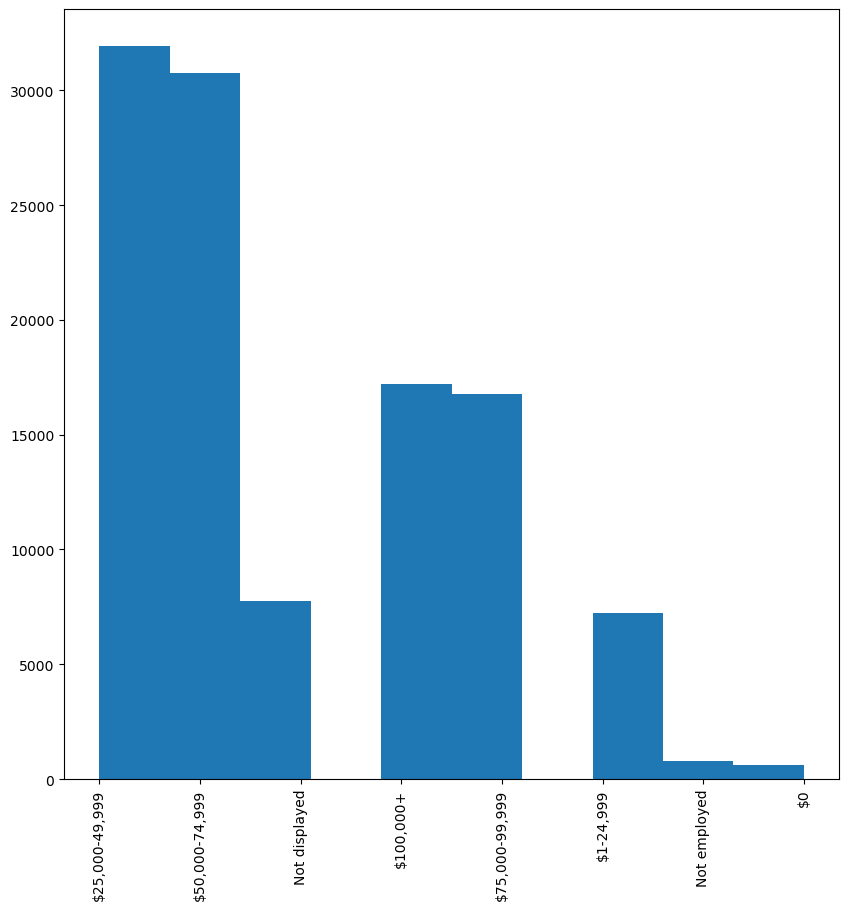

In [11]:
#setting the dimension of the plot and plotting the visualizations
plt.figure(figsize=[10,10])
plt.hist(data = df_work, x ='IncomeRange' )
plt.xticks(rotation=90)
plt.show()

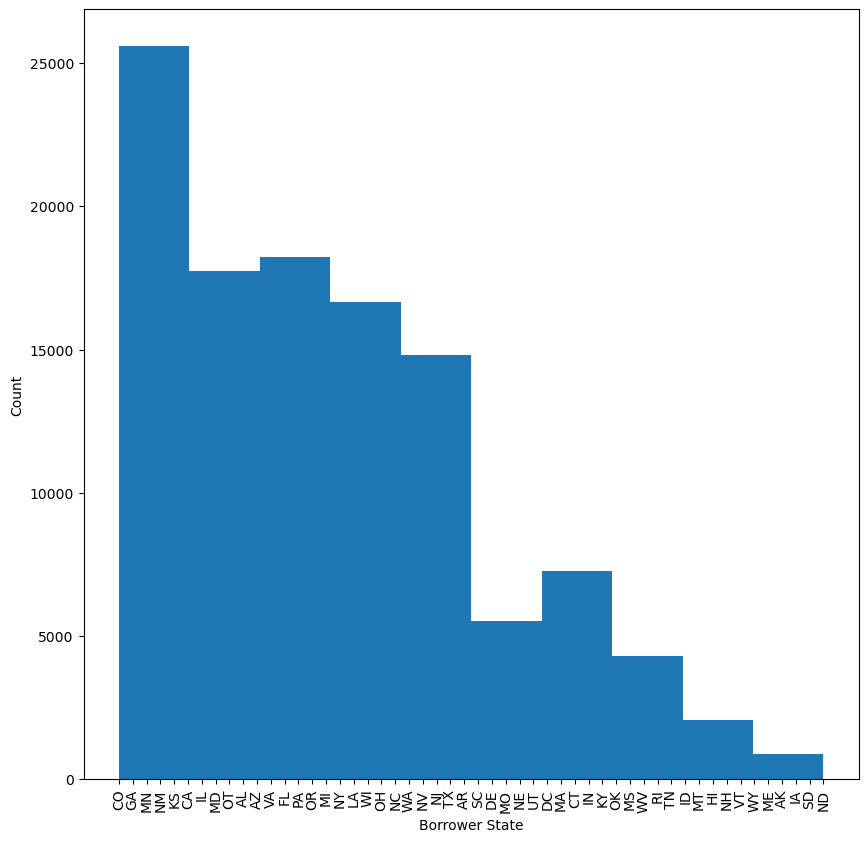

In [14]:
plt.figure(figsize=[10,10])
plt.xlabel('Borrower State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.hist(data = df_work, x ='BorrowerState', )
plt.show()

In [69]:
#Saving the edited dataframe to avoid running cells from above
df_work.to_csv('Data Analytics\Cleaned_prosperLoanData3.csv', index=True)

In [70]:
#creating a function to plot a histogram
def plotHistogram(xlabel, ylabel, rotation, df, x_axis):
    plt.figure(figsize=[10,10])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.hist(data = df, x =x_axis, )
    plt.show()

In [2]:
df_work = pd.read_csv('Data analytics\Cleaned_prosperLoanData3.csv', sep=",")

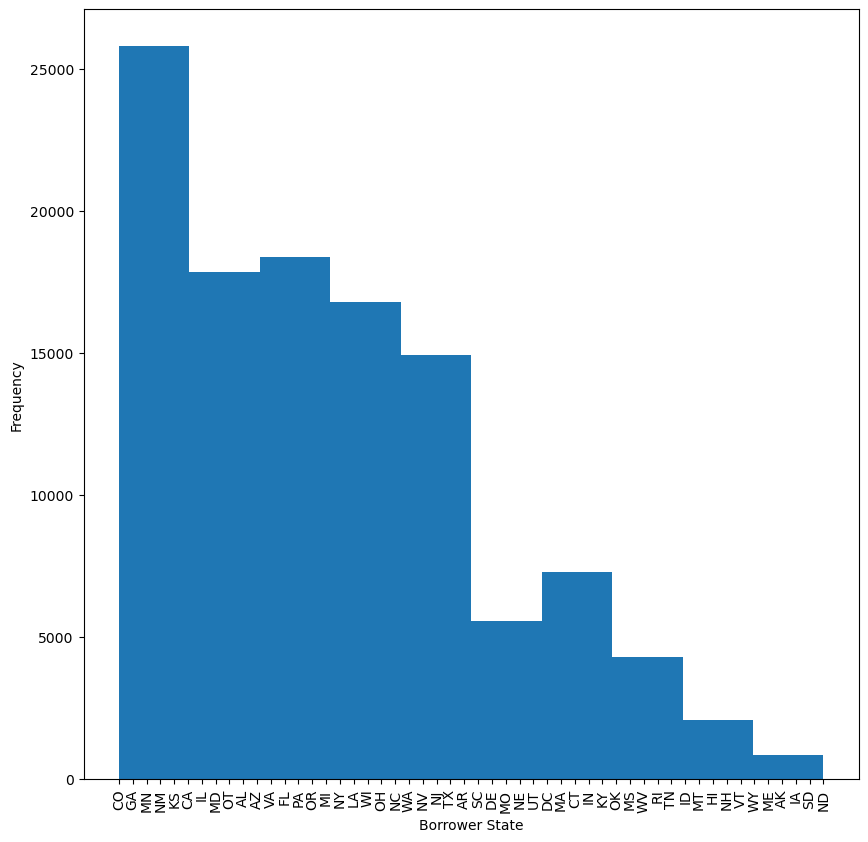

In [71]:
# calling the function to plot  the visualization
plotHistogram('Borrower State', 'Frequency', 90, df_work, 'BorrowerState')

In [72]:
df_work['BorrowerState'].head()

0    CO
1    CO
2    GA
3    GA
4    MN
Name: BorrowerState, dtype: object

(array([25787., 17837., 18380., 16806., 14932.,  5588.,  7312.,  4321.,
         2096.,   878.]),
 array([ 0. ,  5.1, 10.2, 15.3, 20.4, 25.5, 30.6, 35.7, 40.8, 45.9, 51. ]),
 <BarContainer object of 10 artists>)

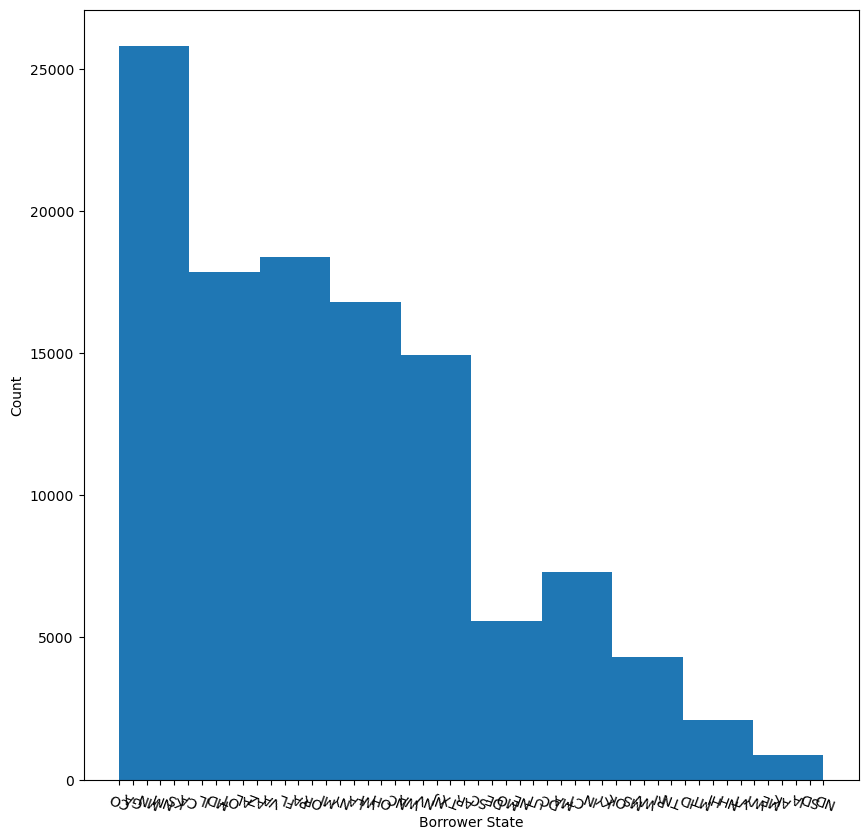

In [73]:
plt.figure(figsize=[10,10])
plt.xlabel('Borrower State')
plt.ylabel('Count')
plt.xticks(rotation=160)
plt.hist(data = df_work, x ='BorrowerState')

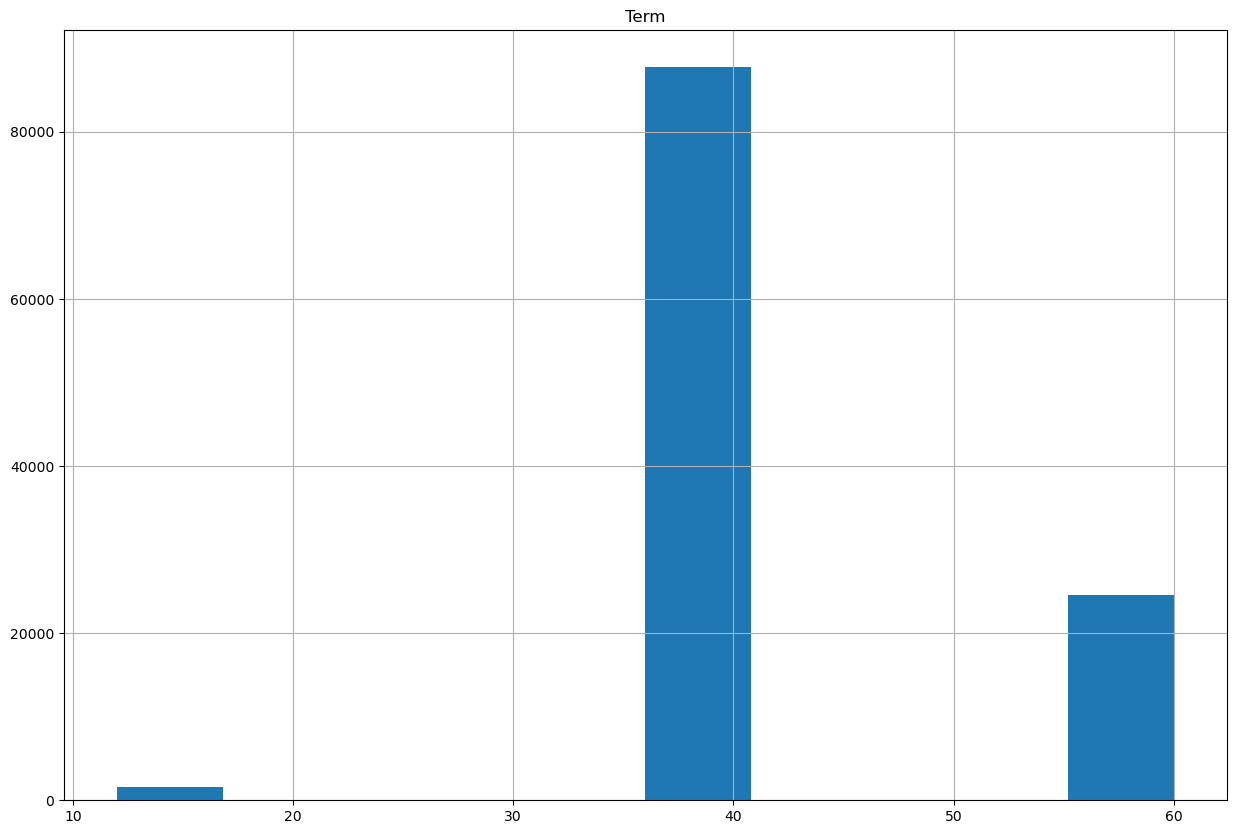

In [74]:
df_work.hist('Term', figsize=[15,10])
plt.show()

In [75]:
df_work.shape

(113937, 14)

In [76]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Term                    113937 non-null  int64  
 1   LoanStatus              113937 non-null  object 
 2   BorrowerAPR             113937 non-null  float64
 3   BorrowerRate            113937 non-null  float64
 4   ListingCategory_n       113937 non-null  int64  
 5   BorrowerState           113937 non-null  object 
 6   Occupation              113937 non-null  object 
 7   IncomeRange             113937 non-null  object 
 8   StatedMonthlyIncome     113937 non-null  float64
 9   LoanOriginalAmount      113937 non-null  int64  
 10  MonthlyLoanPayment      113937 non-null  float64
 11  DebtToIncomeRatio       105383 non-null  float64
 12  IncomeVerifiable        113937 non-null  bool   
 13  listingCategory_labels  113937 non-null  object 
dtypes: bool(1), float64(

#### Exploration


* what is the structure of the data set?
the structure of my data set after wrangling contains of 113066 rows and 15 columns


* what are the main features of interest in your data set?
The main features of interest in this exploration include:
LoanStatus, IncomeRange, BorrowerAPR, BorrowerRate, ListingCategory_n, LoanOriginalAmount      

* what features in the dataset do you think will help support your investigation into your features of interest?
IncomeRange, StatedMonthlyIncome, ListingCategory_n, EmploymentStatus, and MonthlyLoanPayment will support the exploration of LoanStatus
Term, LoanOriginalAmount, and ListingCategory_n will aid in the exploration of BorrowerAPR and BorrowerRate
Term, IncomeRange, and IncomeVerifiable will aid the investigation of LoanOriginalAmount  

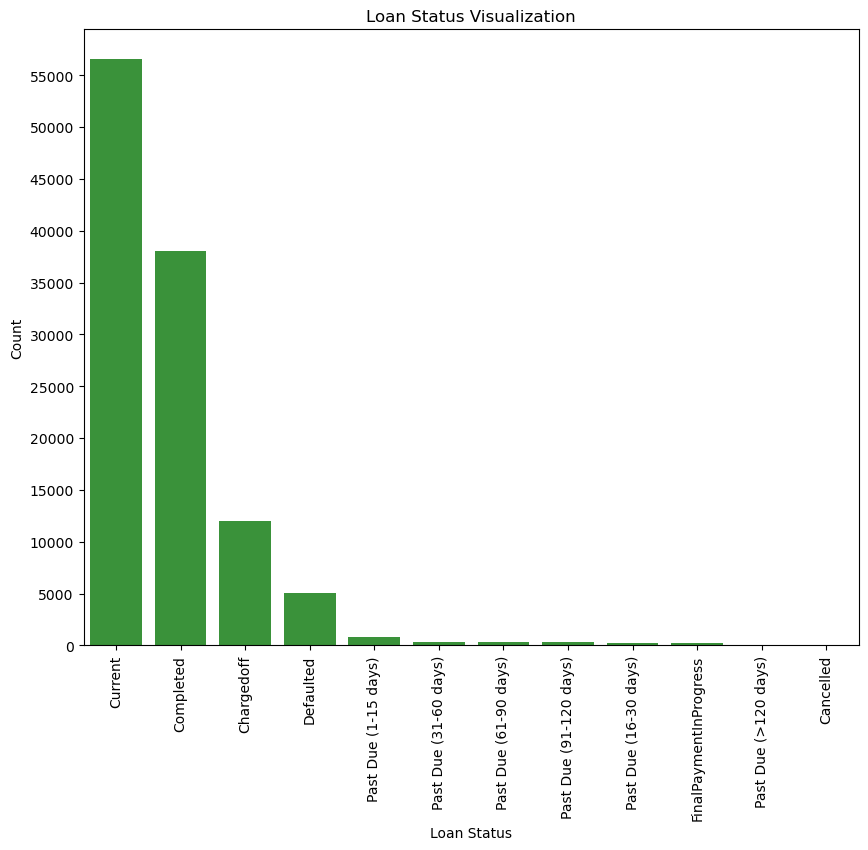

In [77]:
plt.figure(figsize=[10,8])
base_color = sb.color_palette()[2]
status_order = df_work['LoanStatus'].value_counts().index
sb.countplot(data = df_work, x = 'LoanStatus', color = base_color, order = status_order)
plt.title('Loan Status Visualization')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.yticks(range(0, 60000, 5000))
plt.show()

We can observe that most of the loans totalling over 56,000 have the current status indicating that they are still being serviced. We can say the company is doing well given by the number of completed loans as seen in the chart above.

In [86]:
df_work['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [78]:
df_work['BorrowerAPR'].nunique()

6678

In [87]:
df_work['BorrowerAPR'].sample(10)

2749      0.10941
59398     0.19364
63139     0.37453
98696     0.02659
21293     0.22712
2152      0.35643
100275    0.35797
64191     0.10789
44609     0.35797
59827     0.21223
Name: BorrowerAPR, dtype: float64

In [91]:
print(df_work['BorrowerAPR'].max())
print(df_work['BorrowerAPR'].min())
print(df_work['BorrowerAPR'].mean())

0.51229
0.00653
0.2188276559098251


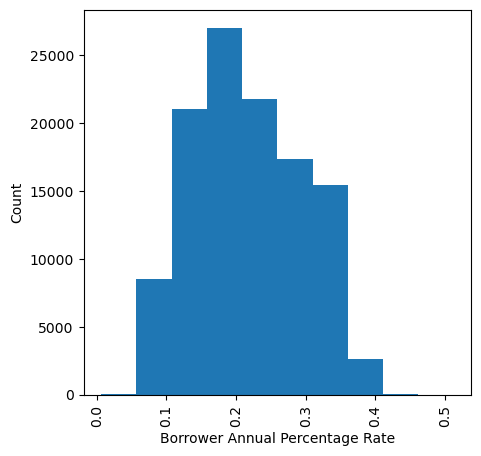

In [98]:
plt.figure(figsize = [5,5])
plt.xlabel('Borrower Annual Percentage Rate')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.hist(data = df_work, x ='BorrowerAPR')
plt.show()

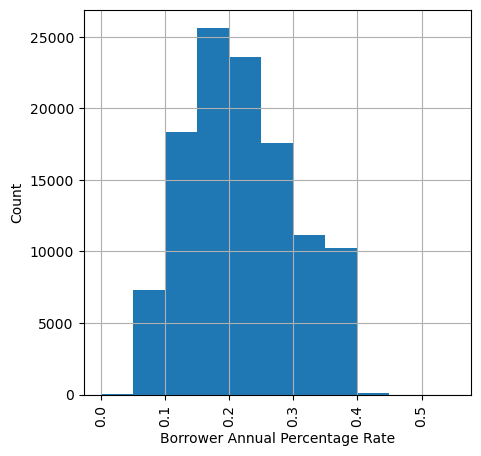

In [101]:
#Plottng with bins
plt.figure(figsize = [5,5])
bins = np.arange(0, df_work['BorrowerAPR'].max()+0.05, 0.05)
plt.xlabel('Borrower Annual Percentage Rate')
plt.grid(visible= True)
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.hist(data = df_work, x ='BorrowerAPR', bins = bins)
plt.show()

In [13]:
df_work = pd.read_csv('Data analytics\Cleaned_prosperLoanData3.csv', sep=",")

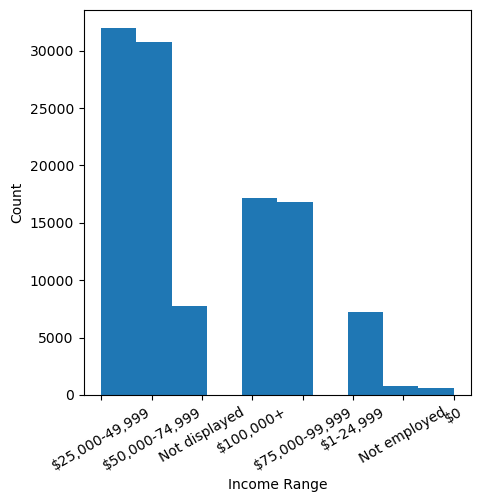

In [4]:
plt.figure(figsize = [5,5])
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.hist(data = df_work, x ='IncomeRange')
plt.show()

In [5]:
print(df_work['ListingCategory_n'].max())
print(df_work['ListingCategory_n'].min())
print(df_work['ListingCategory_n'].mean())

20
0
2.776838306829639


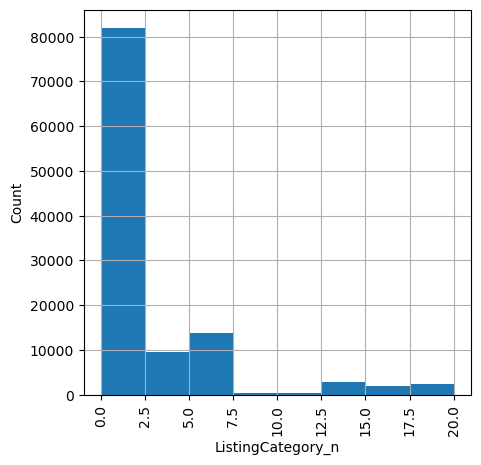

In [13]:
plt.figure(figsize = [5,5])
bins = np.arange(0, df_work['ListingCategory_n'].max()+2.5, 2.5)
plt.xlabel('ListingCategory_n')
plt.grid(visible= True)
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.hist(data = df_work, x ='ListingCategory_n', bins = bins)
plt.show()

In [33]:
df_work.head(2)

Unnamed: 0  Term LoanStatus  BorrowerAPR  BorrowerRate  ListingCategory_n  \
0           0    36  Completed      0.16516         0.158                  0   
1           1    36    Current      0.12016         0.092                  2   

  BorrowerState    Occupation     IncomeRange  StatedMonthlyIncome  \
0            CO         Other  $25,000-49,999          3083.333333   
1            CO  Professional  $50,000-74,999          6125.000000   

   LoanOriginalAmount  MonthlyLoanPayment  DebtToIncomeRatio  \
0                9425              330.43               0.17   
1               10000              318.93               0.18   

   IncomeVerifiable listingCategory_labels  
0              True          Not Available  
1              True       Home Improvement

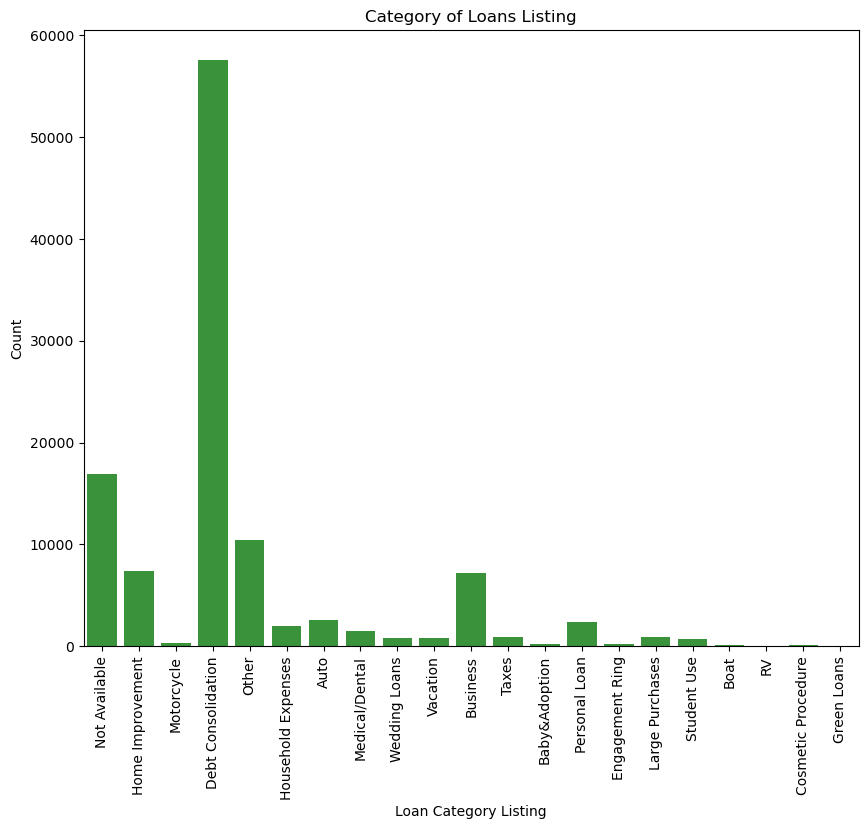

In [35]:
plt.figure(figsize=[10,8])
base_color = sb.color_palette()[2]
# status_order = df_work['listingCategory_labels  '].value_counts().index
sb.countplot(data = df_work, x = 'listingCategory_labels', color = base_color)
# sb.countplot(data = df_work, x = 'listingCategory_labels  ', color = base_color, order = status_order)
plt.title('Category of Loans Listing')
plt.xlabel('Loan Category Listing')
plt.ylabel('Count')
plt.xticks(rotation = 90)
# plt.yticks(range(0, 60000, 5000))
plt.show()

In [14]:
print(df_work['LoanOriginalAmount'].max())
print(df_work['LoanOriginalAmount'].min())
print(df_work['LoanOriginalAmount'].mean())

35000
1000
8314.76230697115


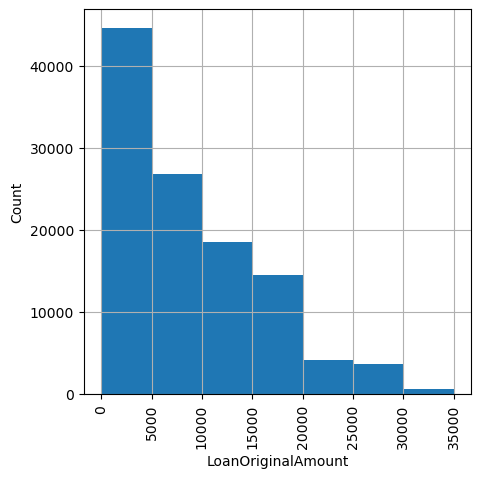

In [19]:
plt.figure(figsize = [5,5])
bins = np.arange(0, df_work['LoanOriginalAmount'].max()+5000, 5000)
plt.xlabel('LoanOriginalAmount')
plt.grid(visible= True)
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.hist(data = df_work, x ='LoanOriginalAmount', bins = bins)
plt.show()

In [21]:
print(df_work['BorrowerRate'].max())
print(df_work['BorrowerRate'].min())
print(df_work['BorrowerRate'].mean())

0.4975
0.0
0.19294574275202098


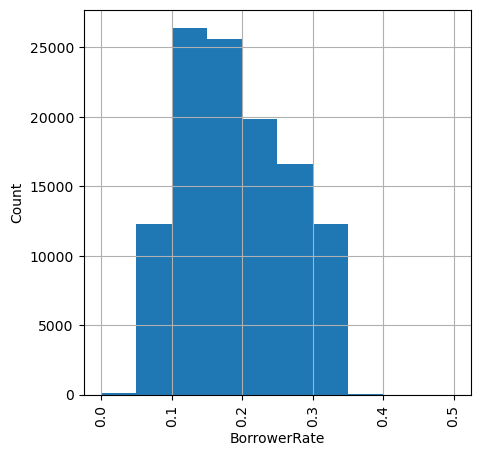

In [24]:
plt.figure(figsize = [5,5])
bins = np.arange(0, df_work['BorrowerRate'].max()+0.05, 0.05)
plt.xlabel('BorrowerRate')
plt.grid(visible= True)
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.hist(data = df_work, x ='BorrowerRate', bins = bins)
plt.show()

### Bi-variate Exploration 

We are plotting the Violin plot and the Box plot

### Violin Plot

MonthlyloanPayment against LoanStatus

In [ ]:
sb.violinplot(data = df_work, x = )

### Multi variate Exploration


In [4]:
df_work.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Term                 113066 non-null  int64  
 1   LoanStatus           113066 non-null  object 
 2   BorrowerAPR          113066 non-null  float64
 3   BorrowerRate         113066 non-null  float64
 4   ListingCategory_n    113066 non-null  int64  
 5   BorrowerState        113066 non-null  object 
 6   Occupation           113066 non-null  object 
 7   IncomeRange          113066 non-null  object 
 8   StatedMonthlyIncome  113066 non-null  float64
 9   LoanOriginalAmount   113066 non-null  int64  
 10  MonthlyLoanPayment   113066 non-null  float64
 11  DebtToIncomeRatio    104594 non-null  float64
 12  IncomeVerifiable     113066 non-null  bool   
dtypes: bool(1), float64(5), int64(3), object(4)
memory usage: 10.5+ MB


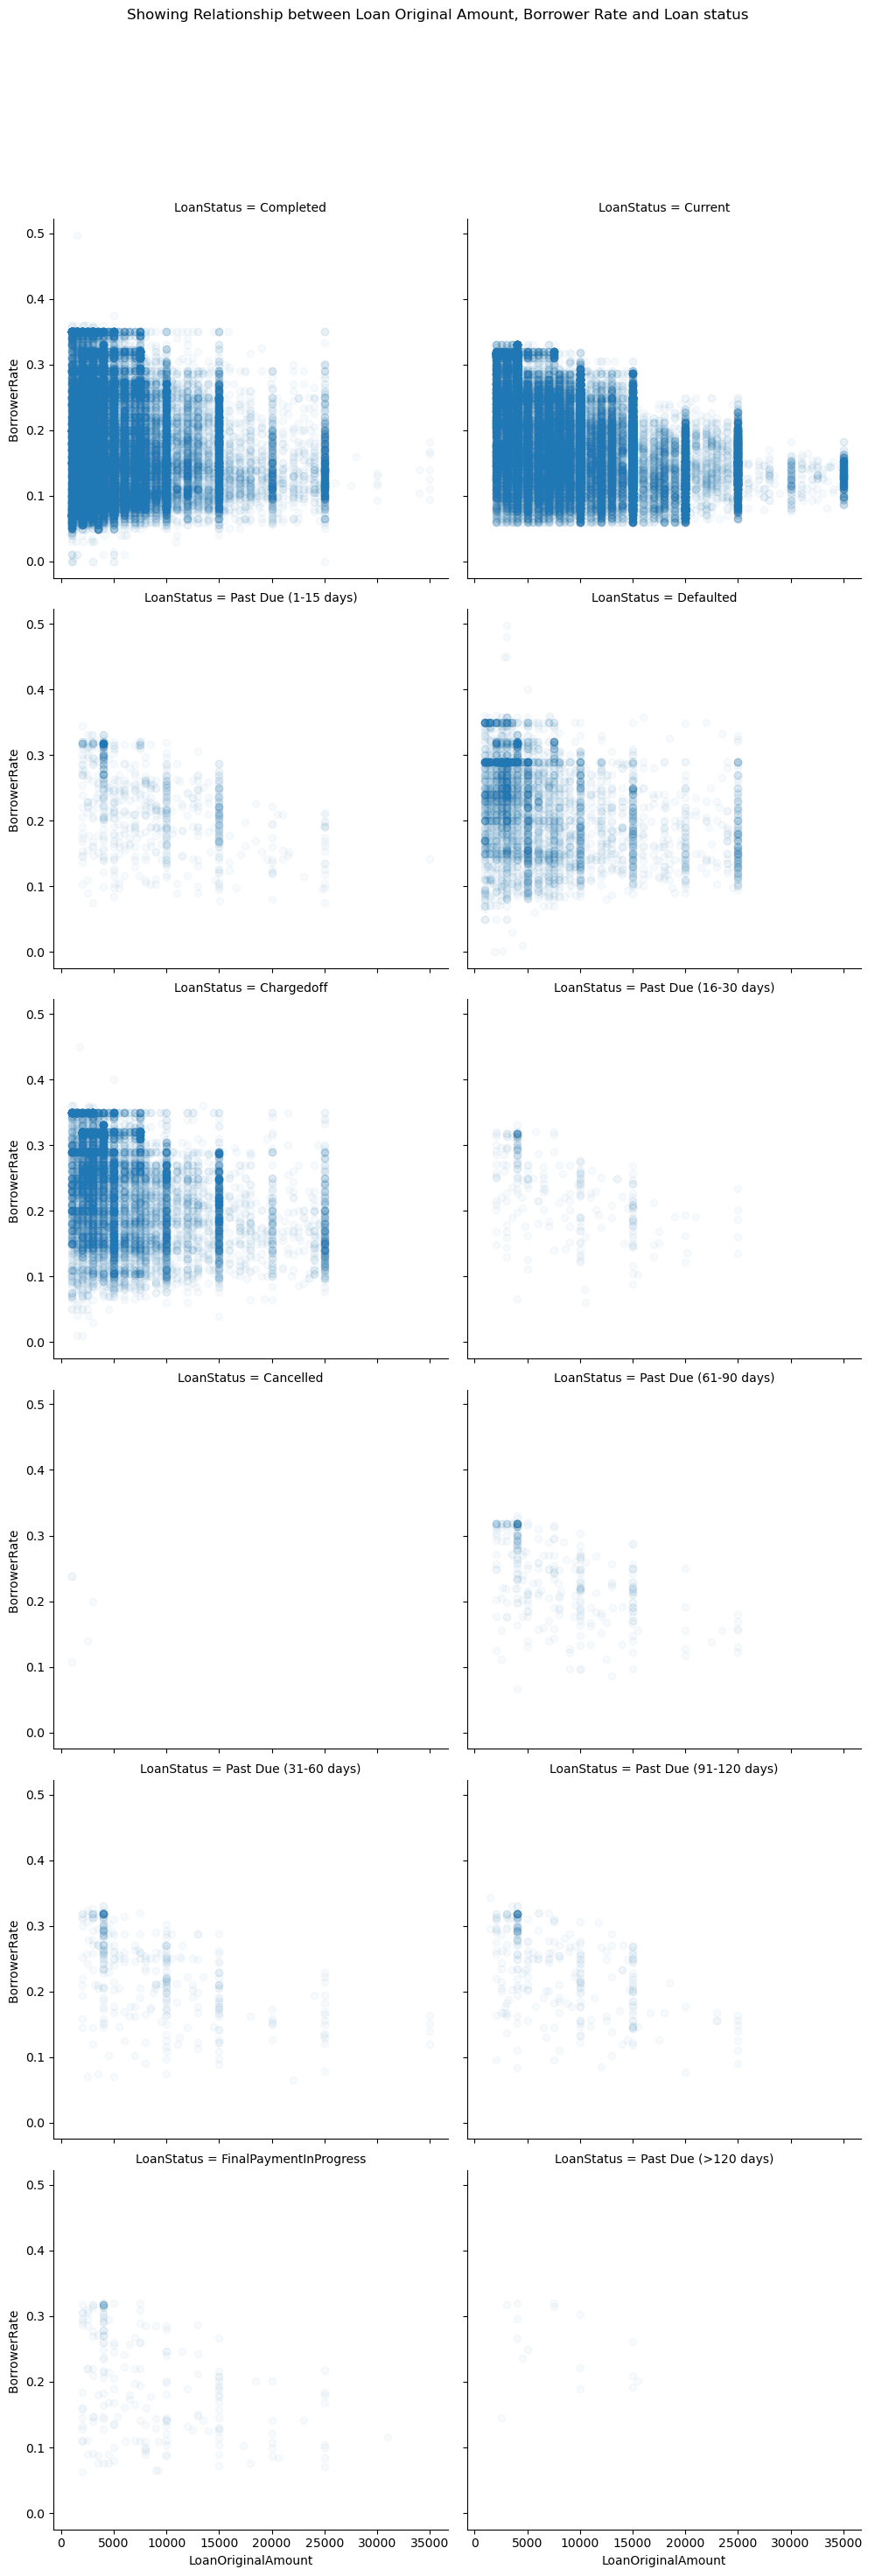

In [23]:
### Scattered Plot
g = sb.FacetGrid(data = df_work, col = 'LoanStatus', col_wrap=2, height = 5)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate', alpha = 1/30)
g.add_legend()
g.set_xlabels('LoanOriginalAmount')
g.set_ylabels('BorrowerRate ')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Showing Relationship between Loan Original Amount, Borrower Rate and Loan status')
plt.show()

### There is a negative relationship between BorrowerRate and LoanOrinalAmount. The Completed and Current Loan Sataus have a higher concentration at a lower Loan Original Amount and at a higher BorrowerRate 

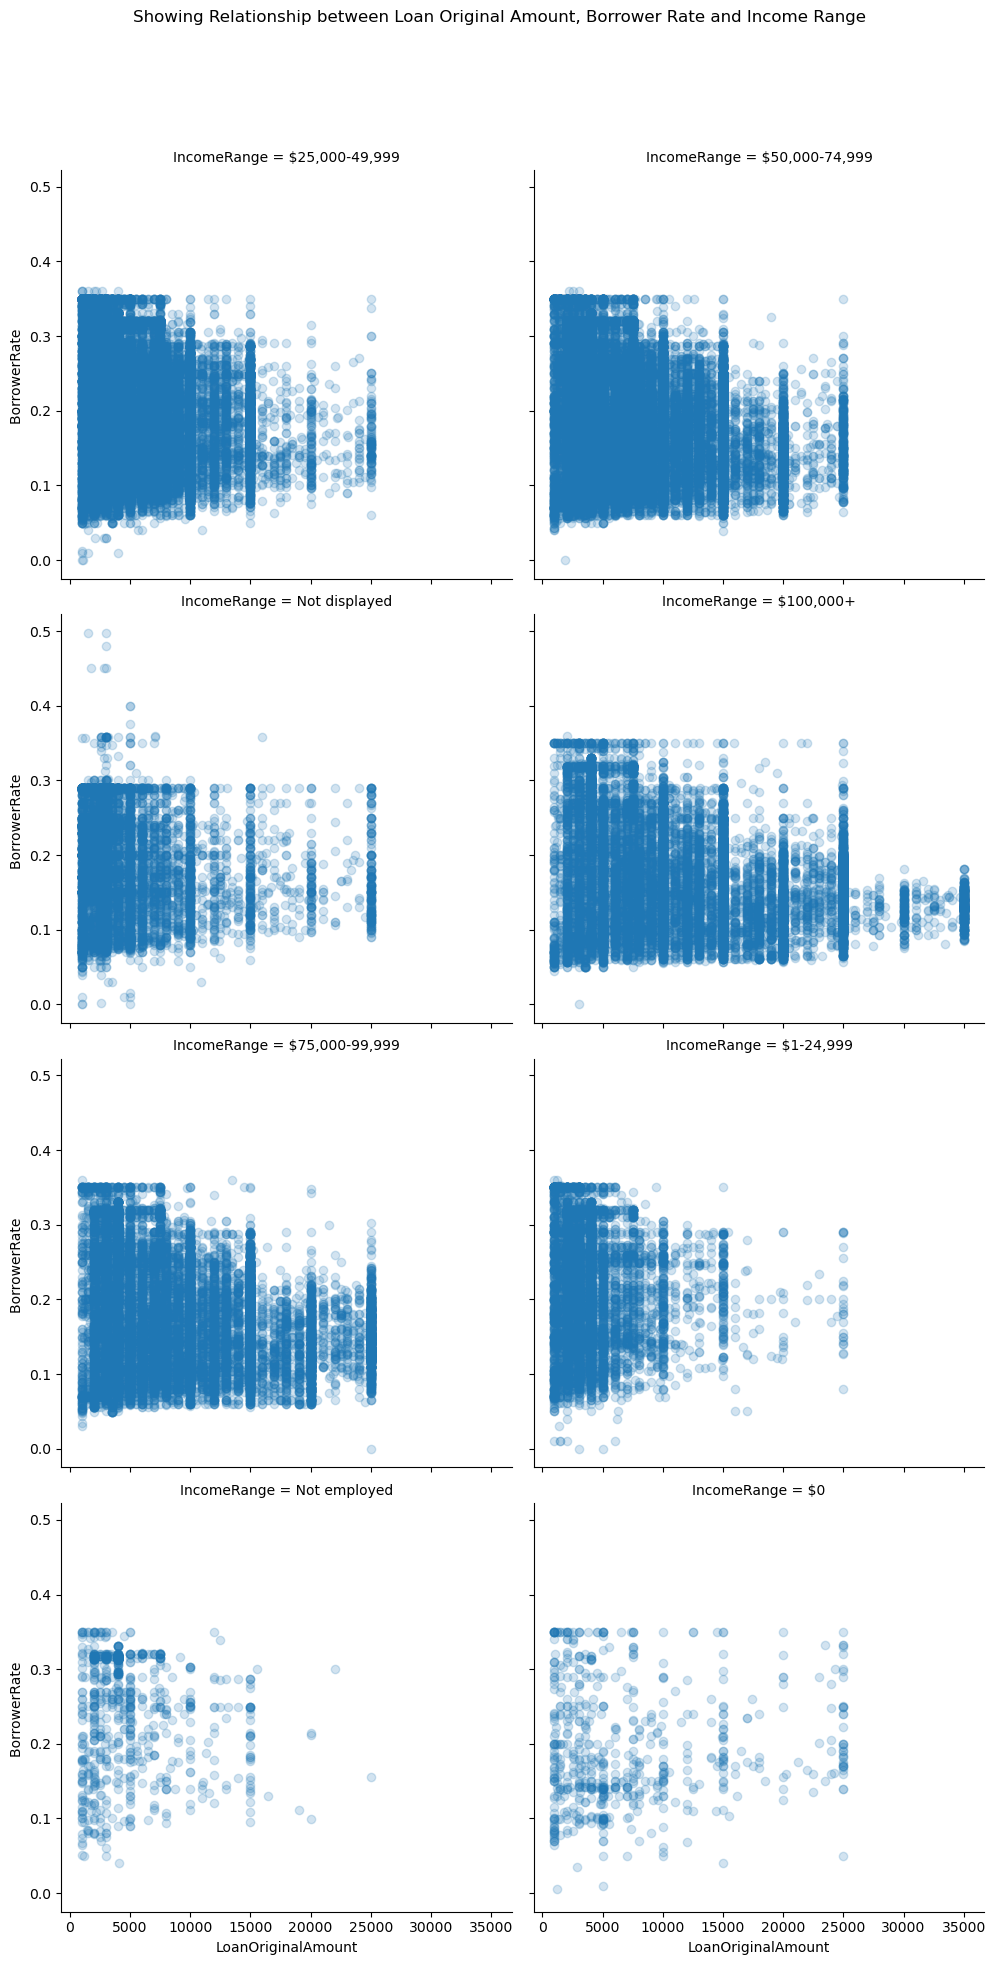

In [26]:
### Scattered Plot
g = sb.FacetGrid(data = df_work, col = 'IncomeRange', col_wrap=2, height = 5)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate', alpha = 1/5)
g.add_legend()
g.set_xlabels('LoanOriginalAmount')
g.set_ylabels('BorrowerRate ')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Showing Relationship between Loan Original Amount, Borrower Rate and Income Range')
plt.show()

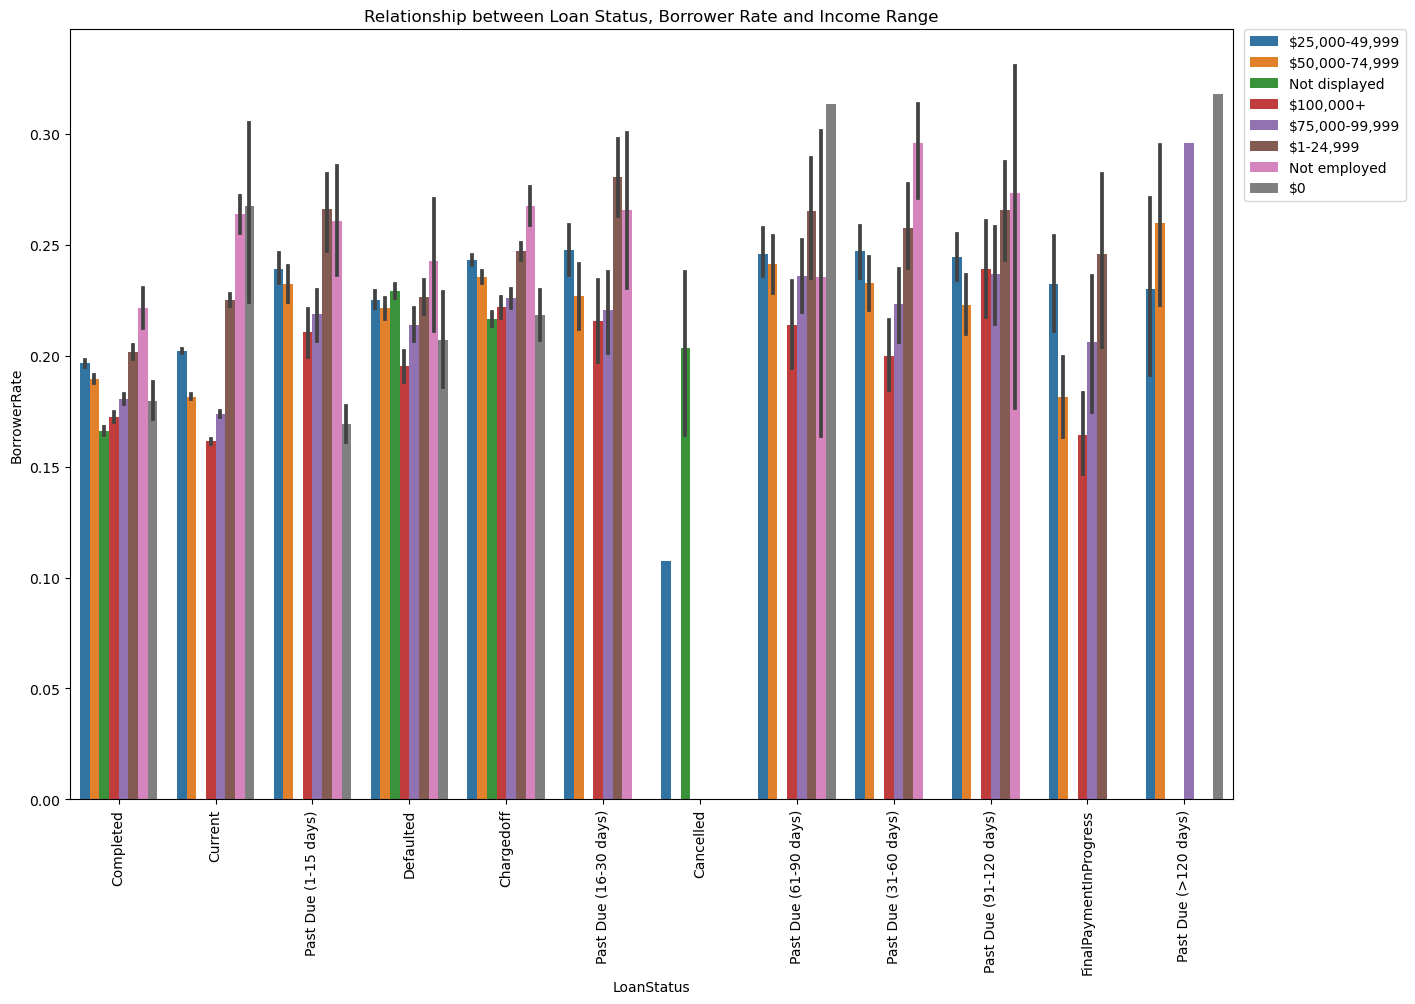

In [45]:
### The BarChart plot
plt.figure(figsize = [15,10])
ax = sb.barplot(data = df_work, x = 'LoanStatus', y = 'BorrowerRate', hue = 'IncomeRange')
ax.legend(loc = 8, framealpha = 1, title = 'Income Range')
plt.legend(bbox_to_anchor = (1.01,1), loc = 0, borderaxespad = 0)
plt.xticks(rotation = 90)
plt.title('Relationship between Loan Status, Borrower Rate and Income Range');